In [142]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import cross_validation
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import svm, grid_search, datasets
from sklearn import lda
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [143]:
iris = pd.read_csv("iris.data", header = -1)
irism = iris.as_matrix()

#Randomize the index
rindex = sklearn.utils.shuffle(range(0,len(irism)))

#randomize inditial matrix
matrix = irism[rindex,:]
irism = matrix

In [144]:
#Split test and train matrix
trainint, testint = cross_validation.train_test_split(irism, test_size=0.33, random_state=1)

#Remove labels
xtrain = trainint[:,:4]
ytrain = trainint[:,4]
xtest = testint[:,:4]
ytest = testint[:,4]

#Scale predictors for Xs on test and train
scaler = sklearn.preprocessing.StandardScaler()
scalefit = scaler.fit(xtrain)
scale_xtrain = scaler.transform(xtrain)
scale_xtest = scaler.transform(xtest)

#Create total scaled matrix for easier access
total_scale_x  = np.ma.row_stack((xtrain,xtest))
total_scale_y = np.concatenate((ytrain,ytest))

#Recombine
train = np.column_stack((scale_xtrain,ytrain))
test = np.column_stack((scale_xtest,ytest))



In [145]:
from sklearn.neighbors import KNeighborsClassifier
KNN = sklearn.neighbors.KNeighborsClassifier()


In [146]:
#parameters = {'algoirthm':('ball_tree', 'kd_tree','brute'), 'weights': ("uniform","distance")}
KNN.fit(scale_xtrain,ytrain)
print KNN.get_params

<bound method KNeighborsClassifier.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=5, p=2, weights='uniform')>


In [147]:
from sklearn.learning_curve import learning_curve
trainlist = numpy.arange(5, 40, 1)
train_sizes, train_scores, test_scores = learning_curve(KNN, total_scale_x, total_scale_y, train_sizes = trainlist)

In [148]:
%matplotlib inline

def plotter(train_scores,test_scores,train_sizes):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",label="Testing score")
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title('Training Curves')
    plt.show()

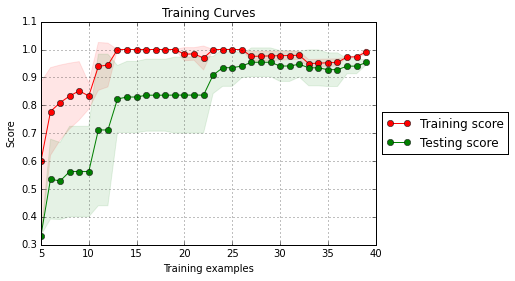

In [149]:
plotter(train_scores,test_scores,train_sizes)

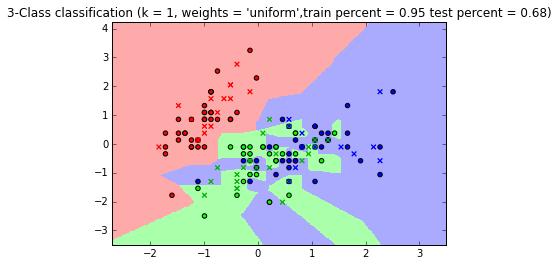

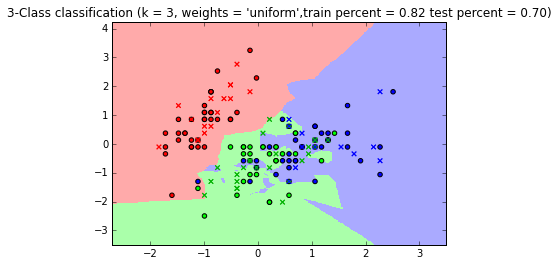

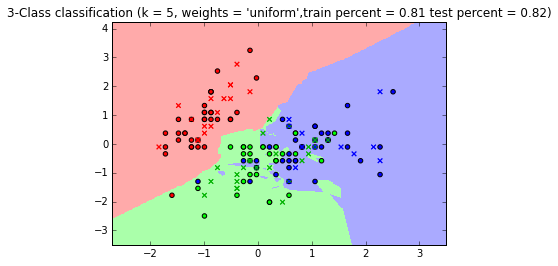

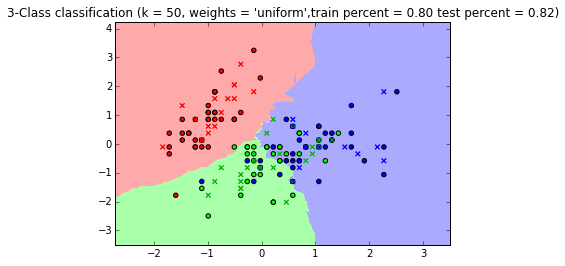

In [150]:
from matplotlib.colors import ListedColormap

k = 5
X = scale_xtrain[:,0:2]
y = ytrain
h = .02 
y2 = le.fit_transform(test[:,4])


le = preprocessing.LabelEncoder()
y = le.fit_transform(ytrain)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_tests = ListedColormap(['#FF0000', '#04B404', '#0000FF'])


weights = "uniform"
for n_neighbors in (1,3,5,50):

    # we create an instance of Neighbours Classifier and fit the data.
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors,weights)
    KNN.fit(X, y)
    train_percent = KNN.score(X, y)


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #Creates set of grid numbers for xmin and xmax(from the dataset) and uses stepH to get the numbers
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Sends all of those numbers into a prediction
    #Unravles matrix into an array
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    
    #Uses xx and yy as the plotting points with Z as the prediction values and applies a color mapping
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    y2labels = le.fit_transform(test[:,4])
    plt.scatter(test[:, 0], test[:, 1], c=y2labels, cmap=cmap_tests, marker = "x")


    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)

        #Plot test points
    y2out = KNN.score(test[:,0:2],y2)
    y2labels = le.fit_transform(test[:,4])
    plt.scatter(test[:, 0], test[:, 1], c=y2labels, cmap=cmap_tests, marker = "x")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s',train percent = %.2f test percent = %.2f)"
              % (n_neighbors, weights,train_percent,y2out))



plt.show()

In [151]:
from sklearn.cross_validation import train_test_split

pca = PCA(n_components=4)
fit = pca.fit(scale_xtest)
pca_scores = pca.transform(total_scale_x)
pca_m = np.column_stack((pca_scores,total_scale_y))


pcatrain, pcatest= train_test_split(pca_m, test_size=0.33, random_state=42)

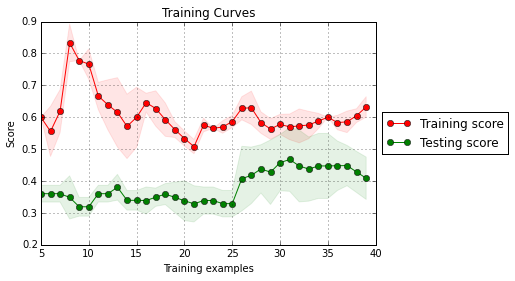

In [152]:
k = 5
X = pcatrain[:,0:2]
y = pcatrain[:,4]
KNN = sklearn.neighbors.KNeighborsClassifier()
trainlist = numpy.arange(5, 40, 1)
train_sizes, train_scores, test_scores = learning_curve(KNN, train[:,0:2], y, train_sizes = trainlist)
plotter(train_scores,test_scores,train_sizes)

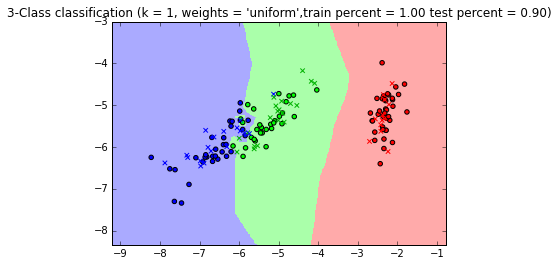

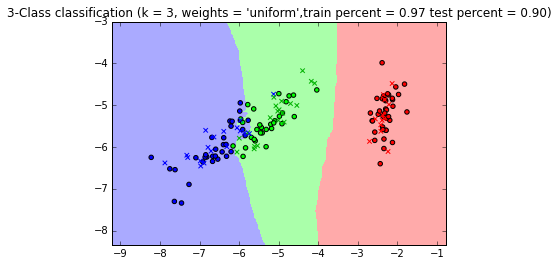

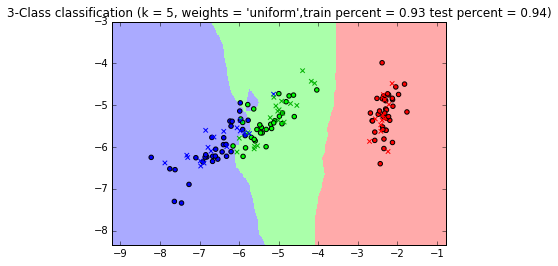

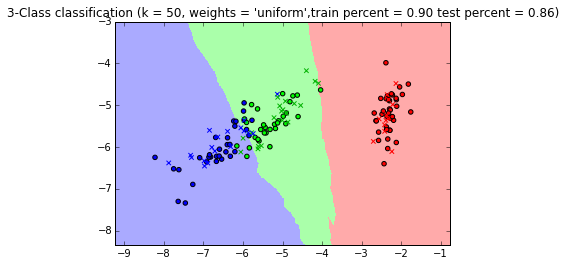

In [153]:
k = 5
X = pcatrain[:,0:2]
y = pcatrain[:,]
h = .02 

le = preprocessing.LabelEncoder()
y = le.fit_transform(pcatrain[:,4])
y2 = le.fit_transform(pcatest[:,4])
#y2out = KNN.predict(pcatest[:,0:2])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_tests = ListedColormap(['#FF0000', '#04B404', '#0000FF'])

weights = "uniform"
for n_neighbors in (1,3,5,50):
    # we create an instance of Neighbours Classifier and fit the data.
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors,weights)
    KNN.fit(X, y)
    train_percent = KNN.score(X, y)


    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #Creates set of grid numbers for xmin and xmax(from the dataset) and uses stepH to get the numbers
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Sends all of those numbers into a prediction
    #Unravles matrix into an array
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    
    #Uses xx and yy as the plotting points with Z as the prediction values and applies a color mapping
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #Plot test points
    y2out = KNN.score(pcatest[:,0:2],y2)
    y2labels = le.fit_transform(pcatest[:,4])
    plt.scatter(pcatest[:, 0], pcatest[:, 1], c=y2labels, cmap=cmap_tests, marker = "x")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s',train percent = %.2f test percent = %.2f)"
              % (n_neighbors, weights,train_percent,y2out))



plt.show()


In [154]:
lda = sklearn.lda.LDA(solver = "eigen")
fit = lda.fit(scale_xtrain,ytrain)
lda_scores = lda.transform(total_scale_x)
lda_m = np.column_stack((lda_scores,total_scale_y))
ldatrain, ldatest= train_test_split(lda_m, test_size=0.33, random_state=42)


In [155]:
print lda_m.shape

(150, 5)


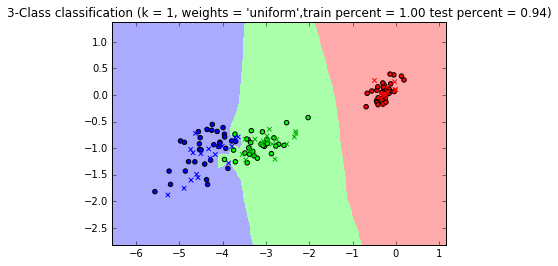

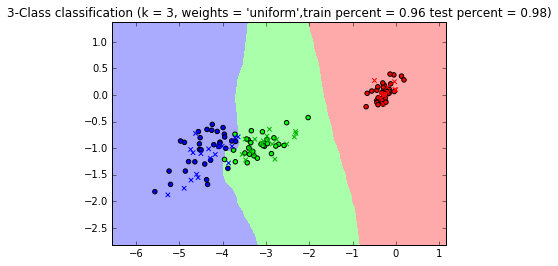

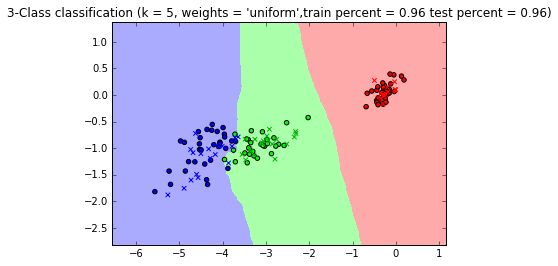

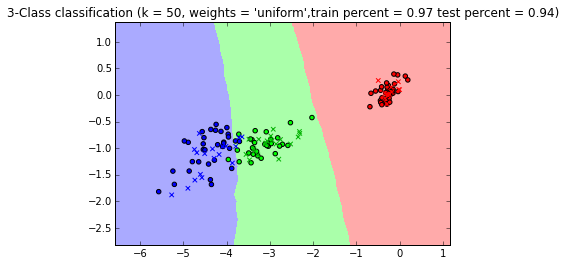

In [156]:
k = 5
X = ldatrain[:,0:2]
y = ldatrain[:,4]
h = .02

le = preprocessing.LabelEncoder()
y = le.fit_transform(ldatrain[:,4])
y2 = le.fit_transform(ldatest[:,4])

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_tests = ListedColormap(['#FF0000', '#04B404', '#0000FF'])
weights = "uniform"
for n_neighbors in (1,3,5,50):
    # we create an instance of Neighbours Classifier and fit the data.
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors,weights)
    KNN.fit(X, y)
    train_percent = KNN.score(X, y)
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #Creates set of grid numbers for xmin and xmax(from the dataset) and uses stepH to get the numbers
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    #Sends all of those numbers into a prediction
    #Unravles matrix into an array
    Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    
    #Uses xx and yy as the plotting points with Z as the prediction values and applies a color mapping
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    
    #Plot test points
    y2out = KNN.score(ldatest[:,0:2],y2)
    y2labels = le.fit_transform(ldatest[:,4])
    plt.scatter(ldatest[:, 0], ldatest[:, 1], c=y2labels, cmap=cmap_tests, marker = "x")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s',train percent = %.2f test percent = %.2f)"
              % (n_neighbors, weights,train_percent,y2out))

plt.show()



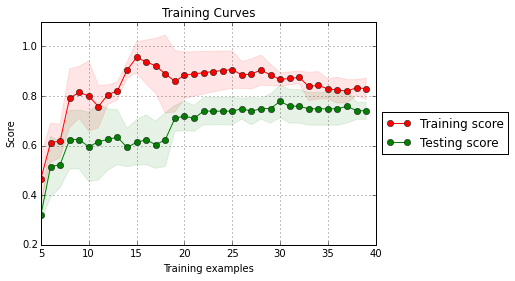

In [157]:
KNN = sklearn.neighbors.KNeighborsClassifier()
X = train[:,0:2]
y = train[:,4]
#y = le.fit_transform(train[:,4])
trainlist = numpy.arange(5, 40, 1)
#KNN.fit(train[:,0:4],train[:,4])
train_sizes, train_scores, test_scores = learning_curve(KNN, train[:,0:2], y, train_sizes = trainlist)
plotter(train_scores,test_scores,train_sizes)

In [158]:
#ldatrain
#ldatest
#pcatrain
#pcatest
#train
#test

In [169]:
kf = cross_validation.KFold(50, n_folds=3)
KNN = sklearn.neighbors.KNeighborsClassifier()
score_list = []
for (trindex, testindex) in kf:
    KNN.fit(total_scale_x[trindex,:2], total_scale_y[trindex])
    score_list.append([KNN.score(total_scale_x[testindex,:2],total_scale_y[testindex]),len(trindex),len(testindex)])
print np.array(score_list)

[[  0.70588235  33.          17.        ]
 [  0.64705882  33.          17.        ]
 [  0.5625      34.          16.        ]]


In [170]:
kf = cross_validation.KFold(50, n_folds=3)
KNN = sklearn.neighbors.KNeighborsClassifier()
score_list = []
for (trindex, testindex) in kf:
    KNN.fit(lda_m[trindex,:2], lda_m[trindex,4])
    score_list.append([KNN.score(lda_m[testindex,:2],lda_m[testindex,4]),len(trindex),len(testindex)])
print np.array(score_list)

[[  1.      33.      17.    ]
 [  1.      33.      17.    ]
 [  0.9375  34.      16.    ]]


In [176]:
kf = cross_validation.KFold(50, n_folds=3)
KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
score_list = []
for (trindex, testindex) in kf:
    KNN.fit(pca_m[trindex,:2], pca_m[trindex,4])
    score_list.append([KNN.score(pca_m[testindex,:2],pca_m[testindex,4]),len(trindex),len(testindex)])
print np.array(score_list)

[[  1.          33.          17.        ]
 [  0.94117647  33.          17.        ]
 [  0.9375      34.          16.        ]]


In [222]:
for i in [1,2,5,10,50,100]:
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    print "KNN"
    kf = cross_validation.KFold(50, n_folds=5)
    
    KNN = sklearn.neighbors.KNeighborsClassifier()
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(total_scale_x[trindex,:4], total_scale_y[trindex]).score(total_scale_x[trindex,:4], total_scale_y[trindex])
        score_list.append([test_score,KNN.score(total_scale_x[testindex,:4],total_scale_y[testindex]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i


    print "LDA"
    KNN = sklearn.neighbors.KNeighborsClassifier()
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(lda_m[trindex,:4], lda_m[trindex,4]).score(lda_m[trindex,:4], lda_m[trindex,4])
        score_list.append([test_score,KNN.score(lda_m[testindex,:4],lda_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i

    print "PCA"
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors=3)
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(pca_m[trindex,:4], pca_m[trindex,4]).score(pca_m[trindex,:4], pca_m[trindex,4])
        score_list.append([test_score,KNN.score(pca_m[testindex,:4],pca_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0])



KNN
[[  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.8    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  1.      0.9    40.     10.   ]]
Average Score 0.97 k = 1
LDA
[[  1.      1.     40.     10.   ]
 [  1.      1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]]
Average Score 0.98 k = 1
PCA
[[  0.975   1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  1.      0.8    40.     10.   ]]
Average Score 0.975 k = 1
KNN
[[  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.8    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  1.      0.9    40.     10.   ]]
Average Score 0.97 k = 2
LDA
[[  1.      1.     40.     10.   ]
 [  1.      1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]]

In [224]:
for i in [1,2,5,10,40]:
    KNN = sklearn.neighbors.KNeighborsClassifier(n_neighbors = i)
    print "KNN"
    kf = cross_validation.KFold(50, n_folds=5)
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(total_scale_x[trindex,:4], total_scale_y[trindex]).score(total_scale_x[trindex,:4], total_scale_y[trindex])
        score_list.append([test_score,KNN.score(total_scale_x[testindex,:4],total_scale_y[testindex]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i


    print "LDA"
    KNN = sklearn.neighbors.KNeighborsClassifier()
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(lda_m[trindex,:4], lda_m[trindex,4]).score(lda_m[trindex,:4], lda_m[trindex,4])
        score_list.append([test_score,KNN.score(lda_m[testindex,:4],lda_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0]), "k =",i

    print "PCA"
    score_list = []
    for (trindex, testindex) in kf:
        test_score = KNN.fit(pca_m[trindex,:4], pca_m[trindex,4]).score(pca_m[trindex,:4], pca_m[trindex,4])
        score_list.append([test_score,KNN.score(pca_m[testindex,:4],pca_m[testindex,4]),len(trindex),len(testindex)])
    print np.array(score_list)
    print "Average Score", np.mean(np.array(score_list)[:,0])




KNN
[[  1.    1.   40.   10. ]
 [  1.    1.   40.   10. ]
 [  1.    1.   40.   10. ]
 [  1.    1.   40.   10. ]
 [  1.    0.9  40.   10. ]]
Average Score 1.0 k = 1
LDA
[[  1.      1.     40.     10.   ]
 [  1.      1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]]
Average Score 0.98 k = 1
PCA
[[  0.975   1.     40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.8    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  1.      0.9    40.     10.   ]]
Average Score 0.97
KNN
[[  0.975   1.     40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.975   1.     40.     10.   ]
 [  1.      0.8    40.     10.   ]]
Average Score 0.98 k = 2
LDA
[[  1.      1.     40.     10.   ]
 [  1.      1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]
 [  0.95    1.     40.     10.   ]
 [  0.975   0.9    40.     10.   ]]
Average Score 0.98 k = 2
PCA
[[  0.975   1.    

In [204]:
#Test Pipeline

0.94000000000000006

In [207]:
(1+1+1+0.8+0.9)/5

0.9400000000000001

In [ ]:
####Complexity graphs